In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [334]:
url = 'train.csv'
data = pd.read_csv(url , sep = ',')

In [335]:
data.head()

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


In [336]:
data.tail()

,TweetClass,TweetID,TweetText
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [337]:
data.index

RangeIndex(start=0, stop=18233, step=1)

In [338]:
data.columns

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


In [340]:
data.shape

(18233, 3)

In [341]:
data.TweetClass.value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

In [342]:
data.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

In [343]:
data[data['TweetText'].isnull() == True]

,TweetClass,TweetID,TweetText
2350,0,591929055093600257,NaN
2540,0,591942970808623104,NaN
2560,0,591945954544066561,NaN
4365,0,592165223047536640,NaN
4418,0,592164390373326848,NaN
4590,0,592182797743333376,NaN
4798,0,592200613863108608,NaN
5213,0,592228742388256768,NaN
5983,0,592268471653793792,NaN


In [344]:
data = data.dropna(axis = 0)

In [345]:
data.isnull().sum()

TweetClass    0
TweetID       0
TweetText     0
dtype: int64

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18224 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18224 non-null int64
TweetID       18224 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 569.5+ KB


In [347]:
sns.set(style = 'darkgrid')

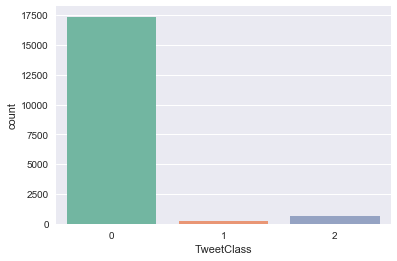

In [348]:
sns.countplot(x = 'TweetClass' , data = data , palette = 'Set2')

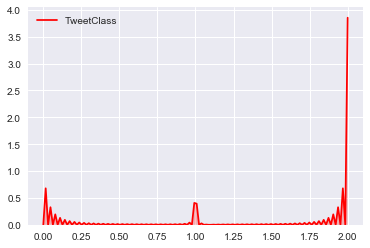

In [349]:
sns.kdeplot(data = data.TweetClass , color = 'red' , shade = True , kernel = 'gau' , legend = True)

In [350]:
irr_df = data[data['TweetClass'] == 0]
print(irr_df.shape)
irr_df.head()

(17361, 3)


,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


In [351]:
demand_df = data[data['TweetClass'] == 1]
print(demand_df.shape)
demand_df.head()

(199, 3)


,TweetClass,TweetID,TweetText
17370,1,591922042481479680,Nepal seeks mobile medical assistance from India
17371,1,591979790627840000,Nepalis r w/o water &amp electricity Water is ...
17372,1,591985311665684480,The wounded and untimely families need to take...
17373,1,591989264256106499,they are in search of blood donors for the peo...
17374,1,591987020924260354,Walked all around central &amp old KTM.Shops o...


In [352]:
supply_df = data[data['TweetClass'] == 2]
print(supply_df.shape)
supply_df.head()

(664, 3)


,TweetClass,TweetID,TweetText
17568,2,591915875638325248,Indian Prime Minister Narendra Modi has announ...
17569,2,591933551798419456,Phone from NTC does not take money when you ca...
17570,2,591939270673182721,India has sent 5 helicopters for relief and re...
17571,2,591968116919410690,NDRF personnel relief material was sent to Nep...
17572,2,591974898139987968,#SriLanka to fly emergency medical help food t...


In [353]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [365]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'orange' , width=1600 , height=800)

In [366]:
vect0 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,1),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
raw_irr_df = vect0.fit_transform(irr_df['TweetText'])
irr_result = dict(zip(vect0.get_feature_names(),raw_irr_df.sum(axis = 0).A1))

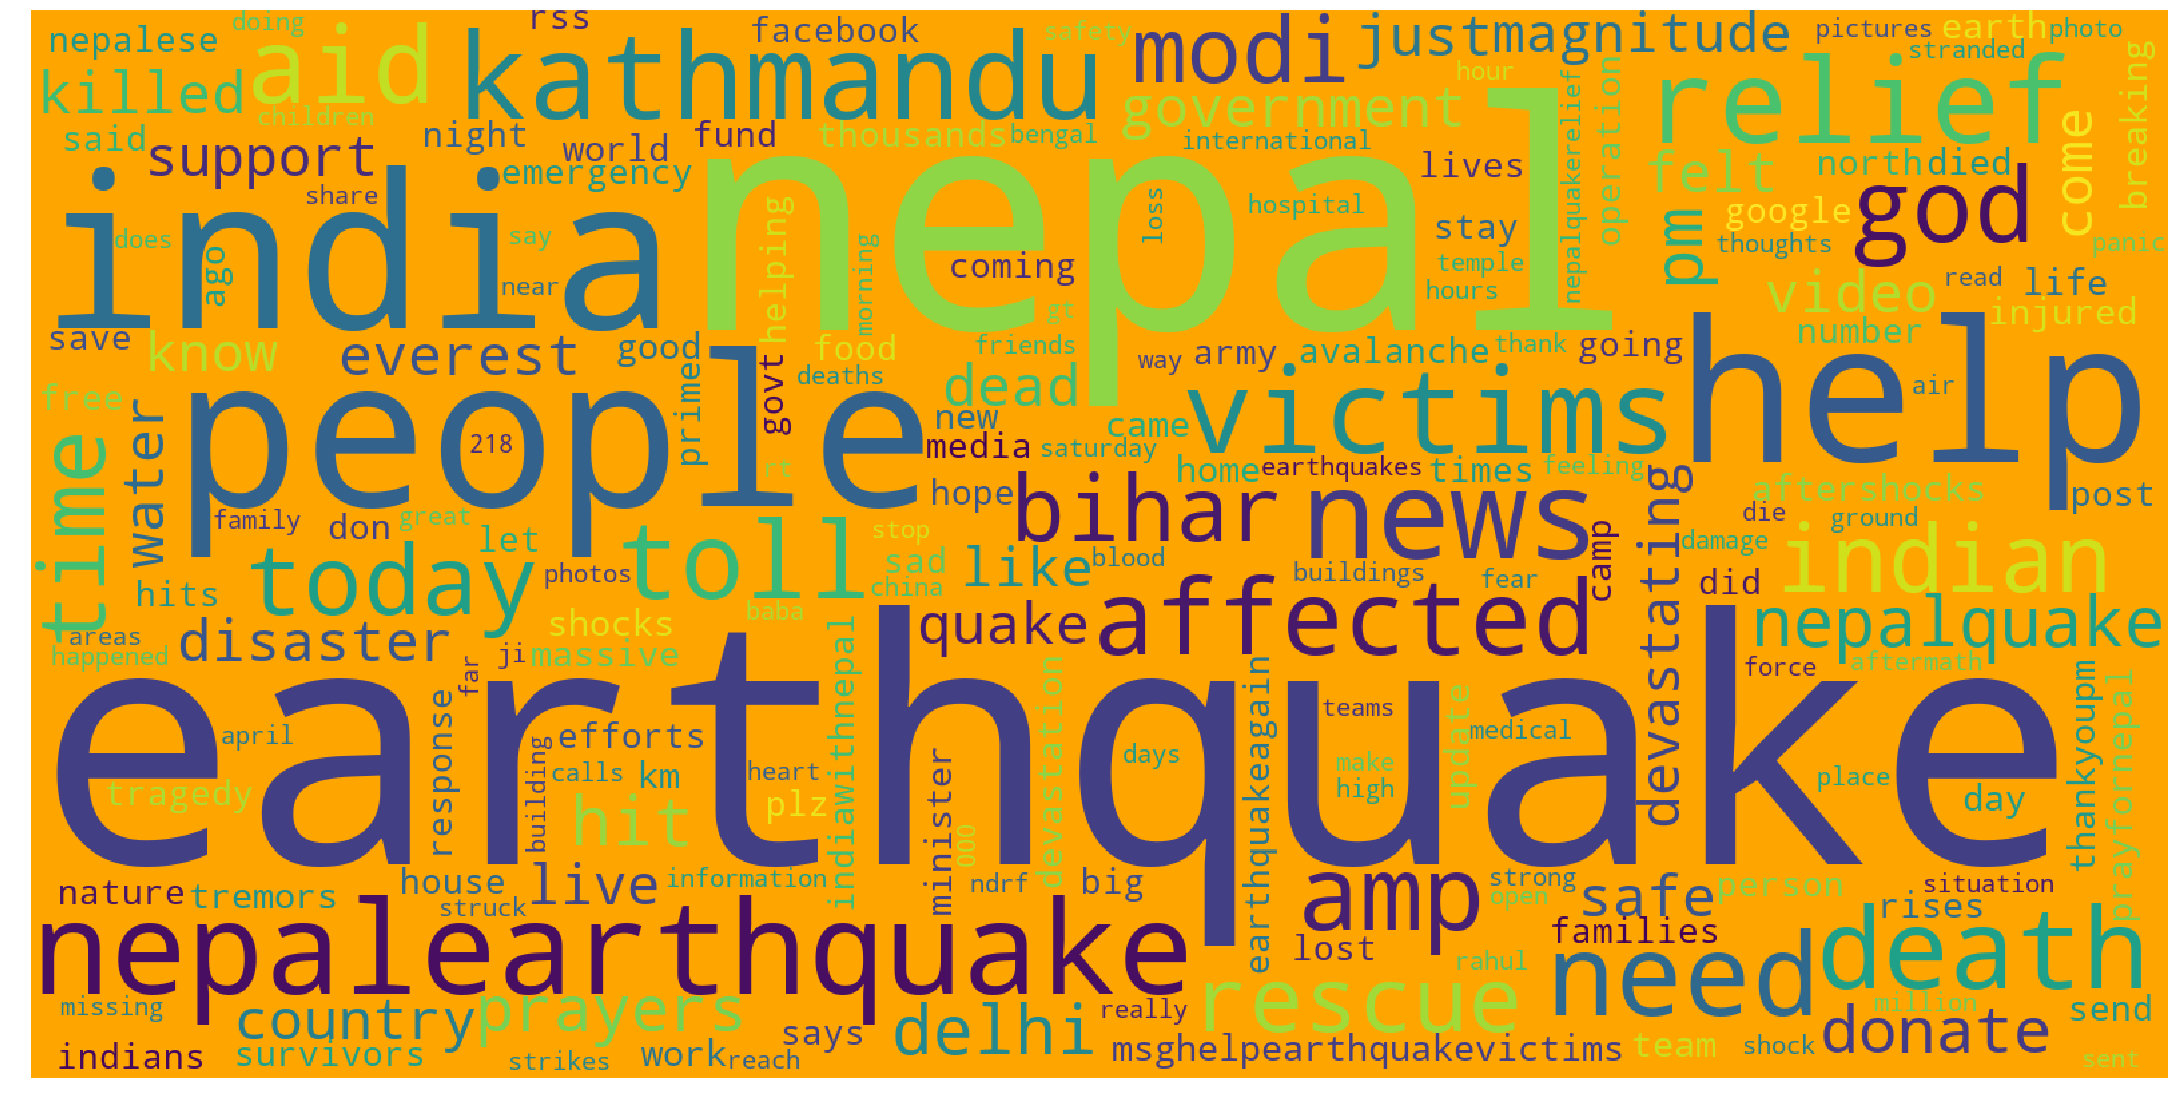

In [367]:
wc0 = wc.generate_from_frequencies(irr_result)
plt.figure(figsize = (30,20))
plt.imshow(wc0)
plt.axis('off')
plt.tight_layout(pad = 0)
fig.savefig("irr_df_wordcloud.png")

In [368]:
vect1 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,1),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
raw_demand_df = vect1.fit_transform(demand_df['TweetText'])
demand_result = dict(zip(vect1.get_feature_names(),raw_demand_df.sum(axis = 0).A1))

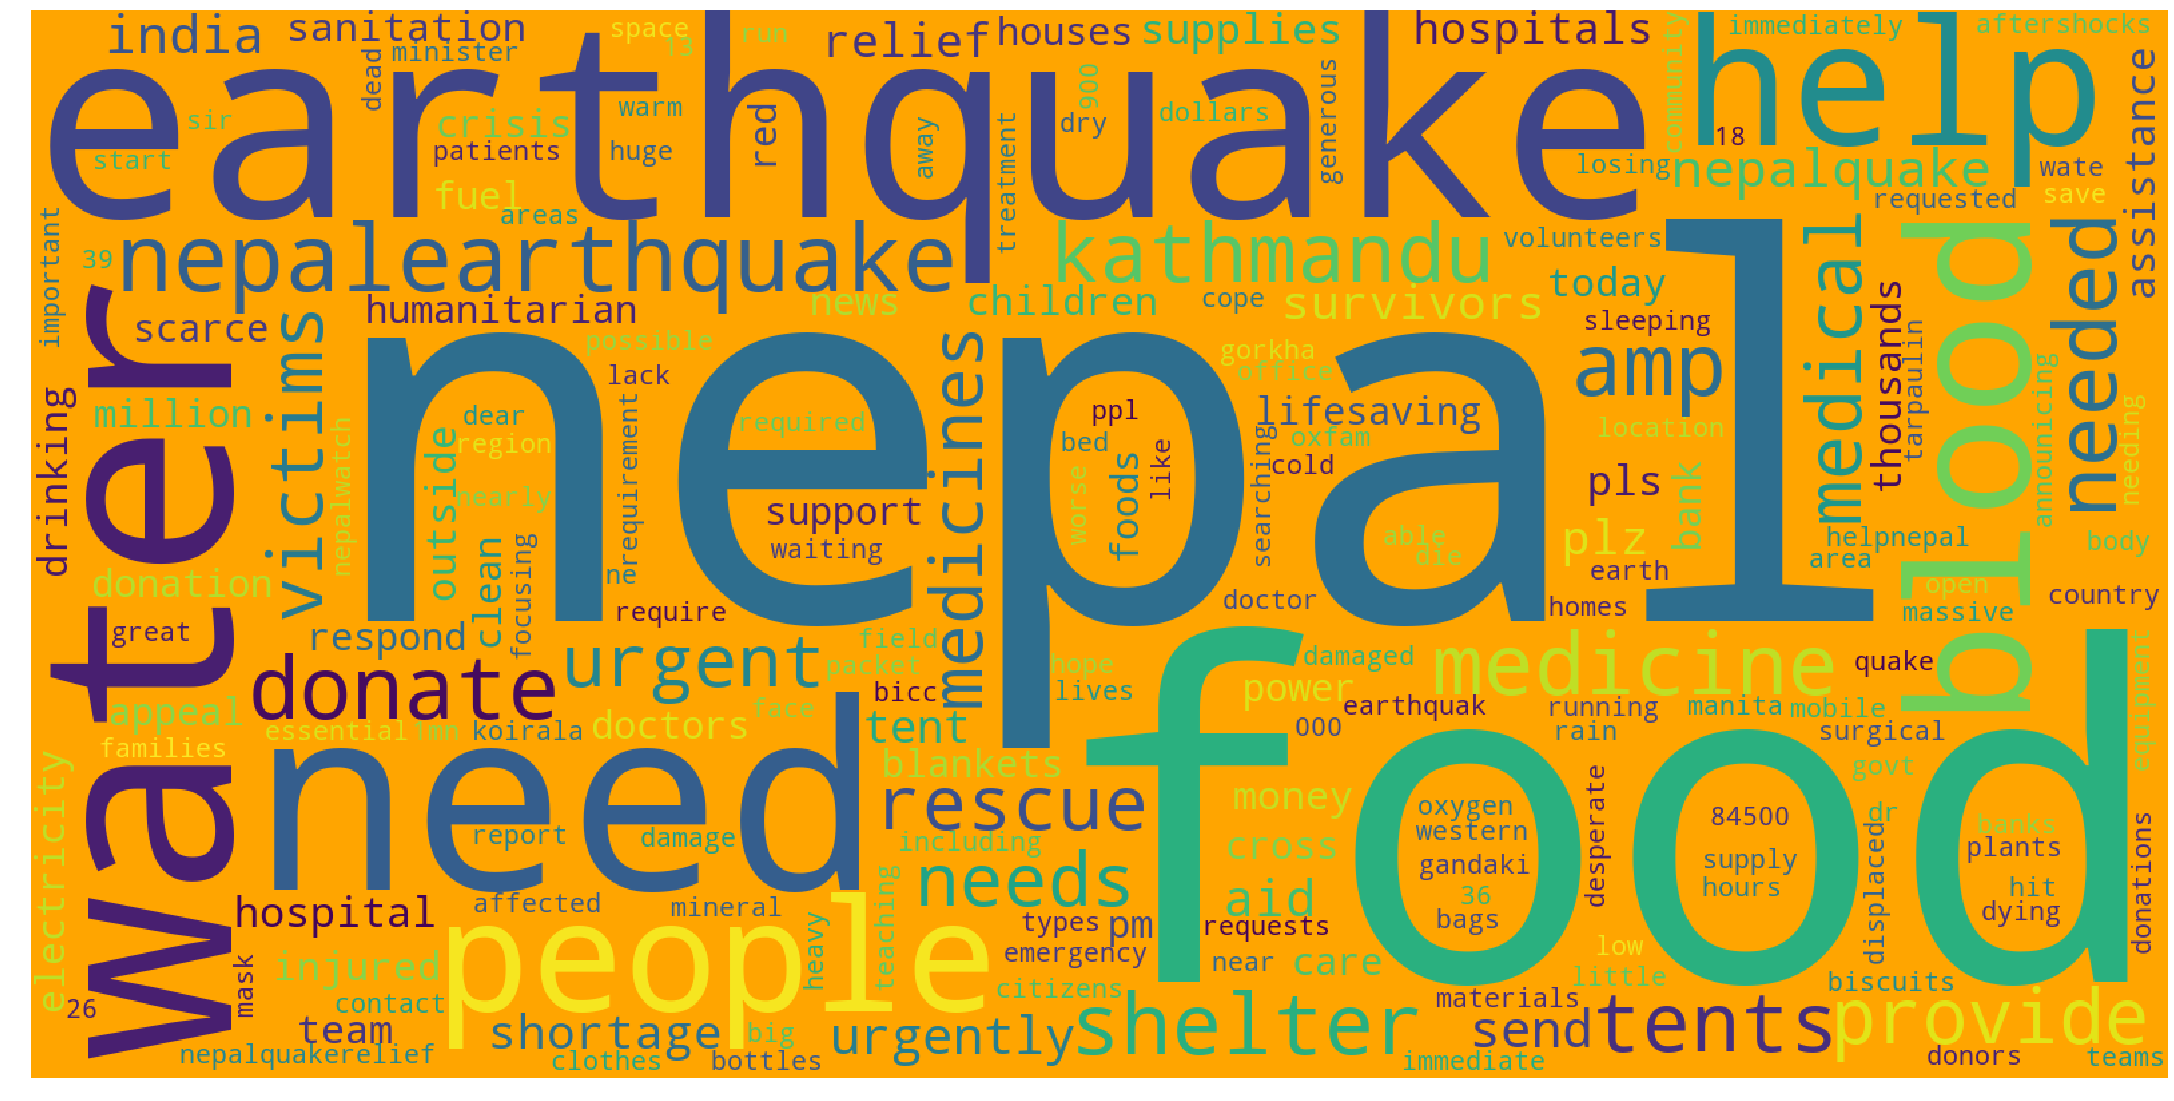

In [369]:
wc1 = wc.generate_from_frequencies(demand_result)
plt.figure(figsize = (30,20))
plt.imshow(wc1)
plt.axis('off')
plt.tight_layout(pad = 0)
fig.savefig("demand_df_wordcloud.png")

In [370]:
vect2 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,1),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
raw_supply_df = vect2.fit_transform(supply_df['TweetText'].values.astype('U'))
supply_result = dict(zip(vect2.get_feature_names(),raw_supply_df.sum(axis = 0).A1))

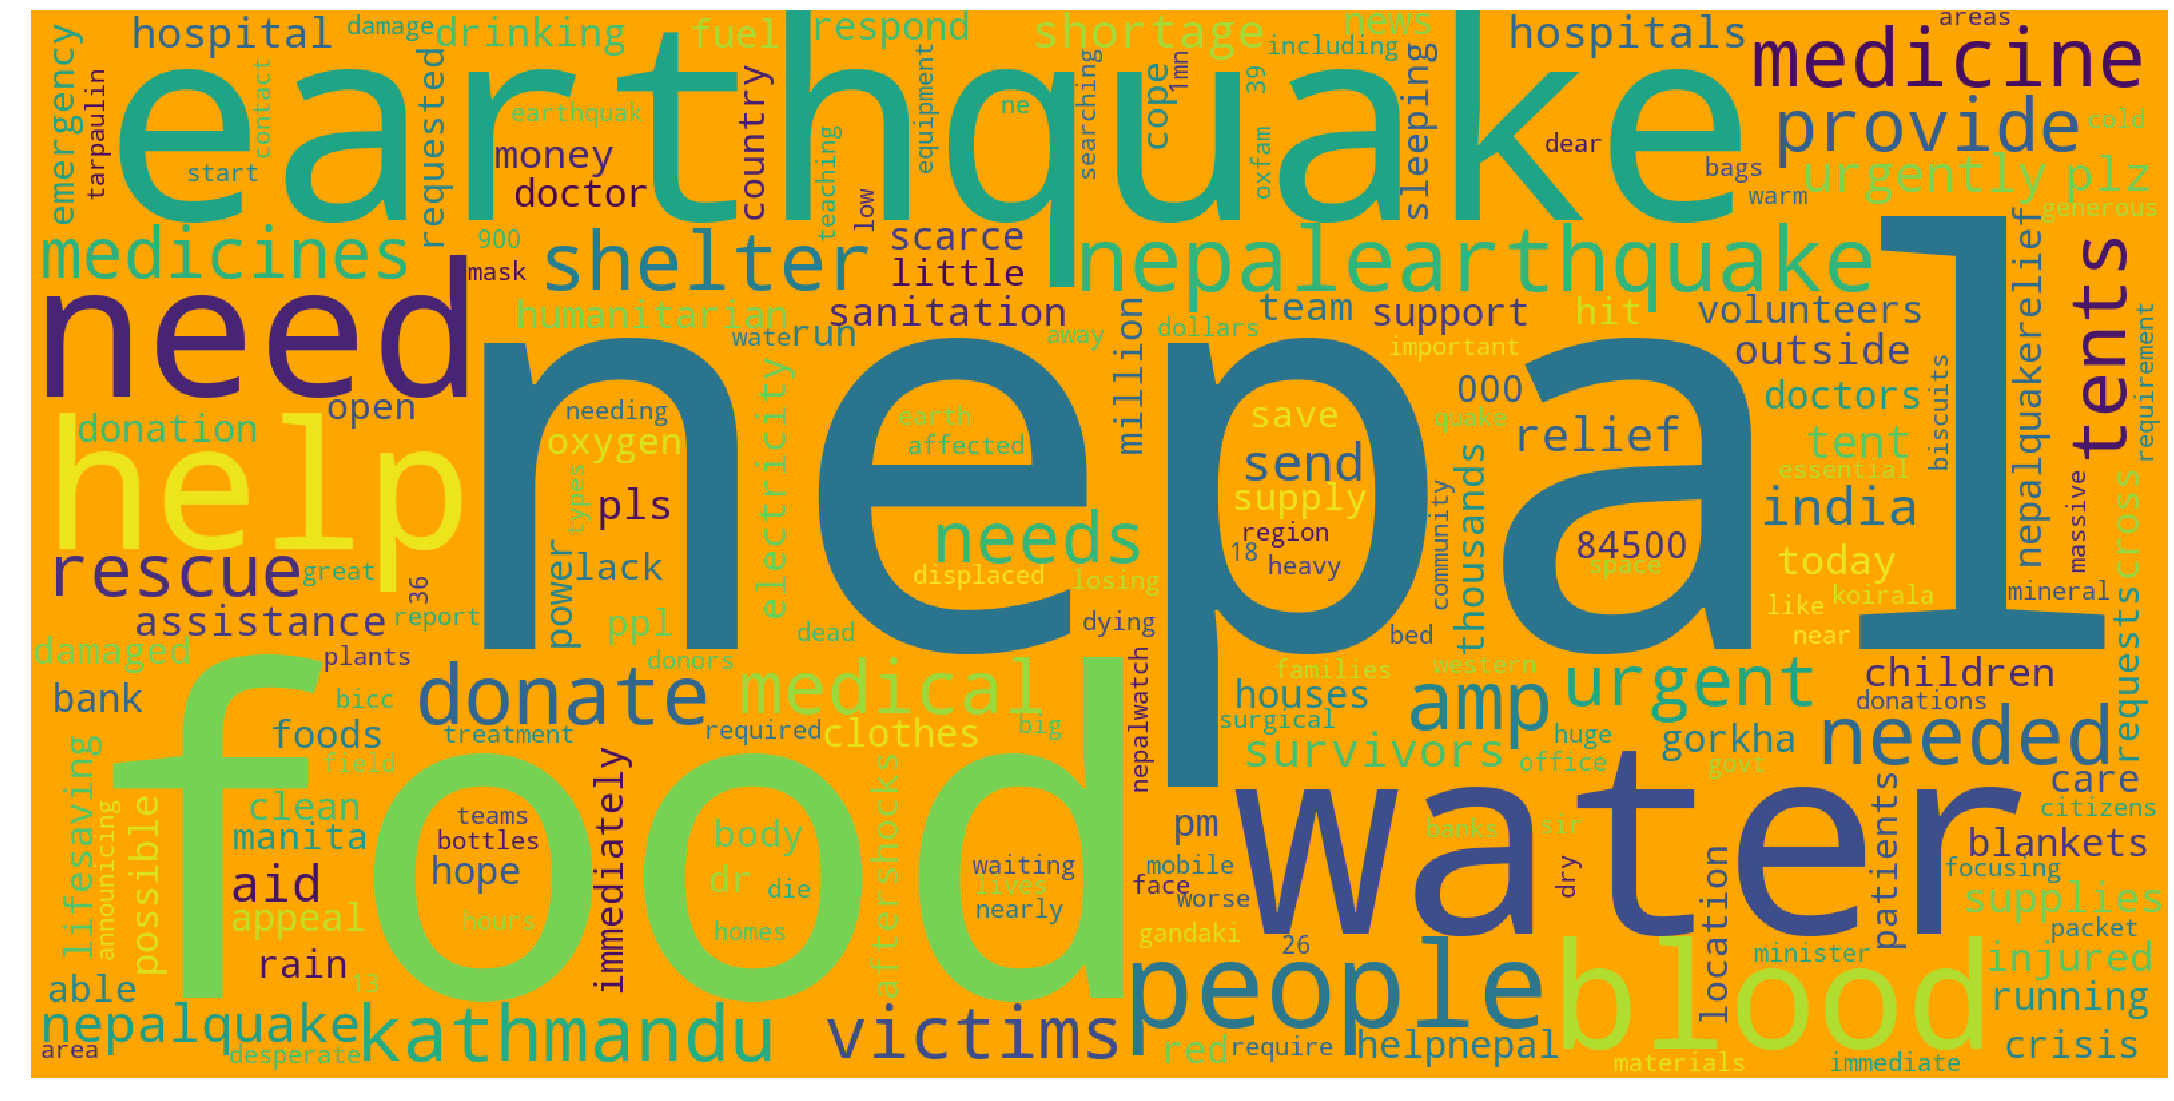

In [371]:
wc2 = wc.generate_from_frequencies(demand_result)
plt.figure(figsize = (30,20))
plt.imshow(wc2)
plt.axis('off')
plt.tight_layout(pad = 0)
fig.savefig("supply_df_wordcloud.png")

In [372]:
vect3 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,1),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
raw_data = vect3.fit_transform(data['TweetText'])

In [377]:
#data2 = pd.DataFrame(raw_data.todense() , columns = vect3.get_feature_names())
#data2.head()

In [378]:
x = raw_data
y = data['TweetClass']

In [379]:
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit

In [380]:
tts = train_test_split(x , y , train_size = 0.7 , random_state = 0 , stratify = y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [381]:
#sss = StratifiedShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 0)

In [382]:
#for train_index, test_index in sss.split(x, y):
 #   x_train, x_test = x[train_index], x[test_index]
  #  y_train, y_test = y[train_index], y[test_index]

In [383]:
x_train , x_test , y_train , y_test = tts

In [384]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

In [385]:
model1.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [388]:
y_pred = model1.predict(x_test)

In [389]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [390]:
print(confusion_matrix(y_test , y_pred))

[[5209    0    0]
 [  60    0    0]
 [ 191    0    8]]


In [401]:
print(classification_report(y_test , y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      5209
          1       0.00      0.00      0.00        60
          2       1.00      0.04      0.08       199

avg / total       0.95      0.95      0.93      5468



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [402]:
print(accuracy_score(y_test , y_pred))

0.954096561814
